In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
import zipfile
with zipfile.ZipFile('../content/creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../content/')

In [3]:
data=pd.read_csv('../content/creditcard.csv')

In [4]:
data.shape

(284807, 31)

In [5]:
X = data.loc[:, data.columns != 'Class']
Y = data.Class

In [6]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_SM, Y_SM = smote.fit_resample(X, Y)

In [7]:
print(X_SM.shape,Y_SM.shape)

(568630, 30) (568630,)


In [8]:
data_SM = pd.concat([X_SM, Y_SM], axis=1)
print(data_SM.shape)
print(data_SM.groupby('Class').size())

(568630, 31)
Class
0    284315
1    284315
dtype: int64


0    284315
1    284315
Name: Class, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


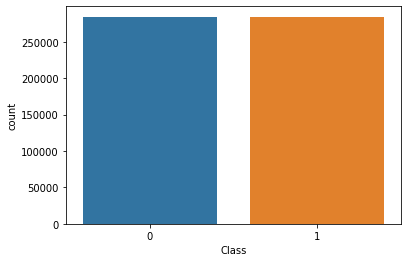

In [9]:
#Fradulent/ Non-Fradulent Samples Plot
y = data_SM["Class"]
sns.countplot(y)
target_temp = data_SM.Class.value_counts()
print(target_temp)

In [10]:
data_SM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [11]:
data_SM.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,87793.948095,-2.482481,1.916179,-3.649202,2.325419,-1.627188,-0.718534,-2.928972,0.278520,-1.328482,...,0.390570,-0.007361,-0.005541,-0.055180,0.026063,0.028061,0.079261,0.040857,95.221386,0.5
std,48157.629735,5.457573,3.636124,6.157440,3.142469,4.137722,1.705347,5.710725,4.942703,2.225923,...,2.831800,1.160561,1.021061,0.539780,0.613983,0.447607,0.951419,0.418197,219.651662,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,45989.909556,-3.061934,-0.097674,-5.232399,-0.054774,-1.823144,-1.553438,-3.259908,-0.198053,-2.318836,...,-0.158519,-0.499620,-0.223358,-0.384264,-0.303057,-0.267513,-0.067781,-0.057317,3.348508,0.0
50%,80282.000000,-0.819532,1.018266,-1.549468,1.482601,-0.443880,-0.692982,-0.751260,0.167880,-0.808235,...,0.160470,0.021302,-0.026799,-0.008542,0.043844,-0.006921,0.058228,0.036690,25.000000,0.5
75%,134757.000000,0.825811,2.893812,0.268228,4.336291,0.431705,0.024926,0.186487,0.854991,0.079897,...,0.649652,0.526683,0.187243,0.339309,0.367712,0.307573,0.431658,0.213024,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.0


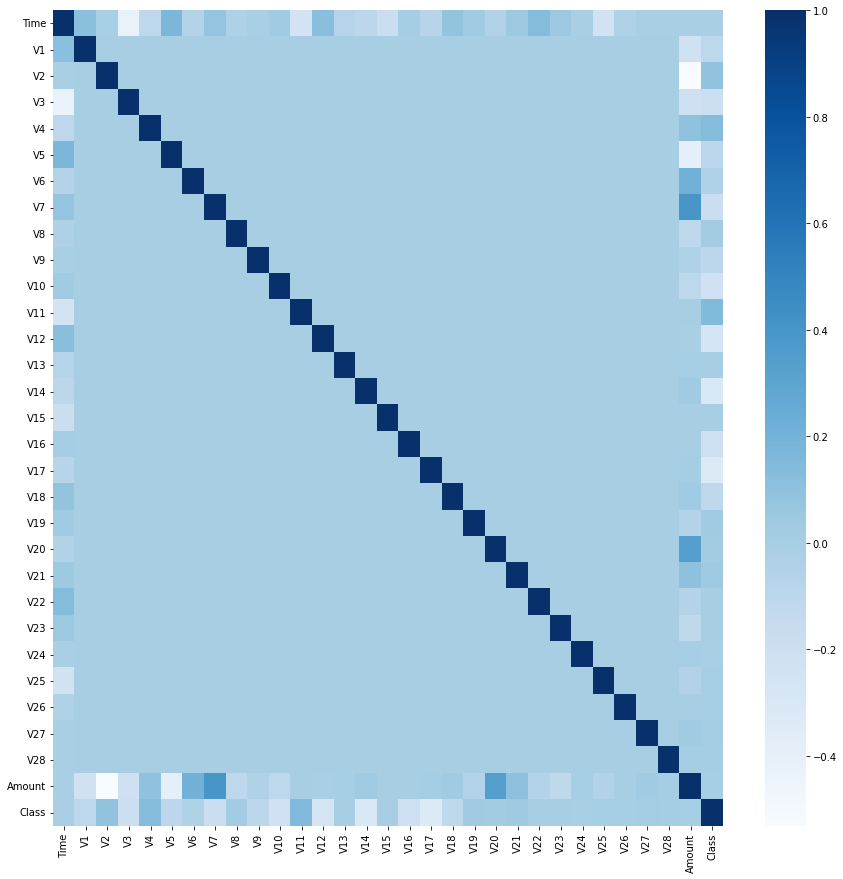

In [12]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap = "Blues")
plt.show()

In [13]:
print(data_SM.corr()["Class"].sort_values(ascending=False))

Class     1.000000
V4        0.742499
V11       0.718984
V2        0.528709
V19       0.294670
V20       0.180431
V21       0.138359
V28       0.098012
V27       0.083618
V26       0.062891
V8        0.056550
V25       0.042567
Amount    0.031552
V23      -0.005495
V22      -0.006322
V13      -0.047889
V15      -0.056890
V24      -0.102564
Time     -0.146275
V5       -0.394575
V6       -0.422760
V1       -0.456383
V18      -0.496845
V7       -0.514578
V17      -0.592669
V3       -0.594626
V9       -0.598830
V16      -0.628701
V10      -0.660877
V12      -0.711718
V14      -0.787998
Name: Class, dtype: float64


In [14]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Class",axis=1)
target = data["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(X_SM,Y_SM,test_size=0.20,random_state=0)

In [15]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(454904, 30) (454904,) (113726, 30) (113726,)


In [ ]:
#Random Forest
rf = RandomForestClassifier()
st=time.time()
rf.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_rf=rf.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_rf)))
st=time.time()
Y_pred_rf = rf.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_rf,average='weighted')))
print(classification_report(Y_test,Y_pred_rf))

Training Time: 536.4684927463531
Training Accuracy Score: 1.0
Pred Time: 1.7373411655426025
Testing Accuracy Score: 0.9998856901675958
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
st=time.time()
dt.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_dt=dt.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_dt)))
st=time.time()
Y_pred_dt = dt.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_dt,average='weighted')))
print(classification_report(Y_test,Y_pred_dt))

Training Time: 57.22370386123657
Training Accuracy Score: 1.0
Pred Time: 0.021892547607421875
Testing Accuracy Score: 0.9987162126514605
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
#LDA
lda = LinearDiscriminantAnalysis()
st=time.time()
lda.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lda=lda.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lda)))
st=time.time()
Y_pred_lda = lda.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lda)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lda,average='weighted')))
print(classification_report(Y_test,Y_pred_lda))

Training Time: 2.630258083343506
Training Accuracy Score: 0.9321966832562475
Pred Time: 0.009154319763183594
Testing Accuracy Score: 0.9331551272356365
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56724
           1       0.99      0.88      0.93     57002

    accuracy                           0.93    113726
   macro avg       0.94      0.93      0.93    113726
weighted avg       0.94      0.93      0.93    113726



In [ ]:
#Logistic Regression
lr = LogisticRegression()
st=time.time()
lr.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lr=lr.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lr)))
st=time.time()
Y_pred_lr = lr.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lr)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lr,average='weighted')))
print(classification_report(Y_test,Y_pred_lr))

Training Time: 7.999792814254761
Training Accuracy Score: 0.9721215904894219
Pred Time: 0.009301900863647461
Testing Accuracy Score: 0.9725656402229921
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56724
           1       0.98      0.97      0.97     57002

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [ ]:
#Naive Bayes Classifier
nb = GaussianNB()
st=time.time()
nb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_nb=nb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_nb)))
st=time.time()
Y_pred_nb = nb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_nb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_nb,average='weighted')))
print(classification_report(Y_test,Y_pred_nb))

Training Time: 0.2353975772857666
Training Accuracy Score: 0.867666584598069
Pred time: 0.052304744720458984
Testing Accuracy Score: 0.8673742152190352
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     56724
           1       0.99      0.74      0.85     57002

    accuracy                           0.87    113726
   macro avg       0.89      0.87      0.87    113726
weighted avg       0.89      0.87      0.87    113726



In [ ]:
#AdaBoost Classifier
abc = AdaBoostClassifier()
st=time.time()
abc.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_abc=abc.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_abc)))
st=time.time()
Y_pred_abc = abc.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_abc)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_abc,average='weighted')))
print(classification_report(Y_test,Y_pred_abc))

Training Time: 181.3146767616272
Training Accuracy Score: 0.9801716406098869
Pred time: 1.1731598377227783
Testing Accuracy Score: 0.9805761215553171
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56724
           1       0.99      0.97      0.98     57002

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [ ]:
#XGBoost Classifier
import xgboost
xgb = xgboost.XGBClassifier(objective="binary:logistic")
st=time.time()
xgb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_xgb=xgb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_xgb)))
st=time.time()
Y_pred_xgb = xgb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_xgb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_xgb,average='weighted')))
print(classification_report(Y_test,Y_pred_xgb))

Training Time: 134.93938159942627
Training Accuracy Score: 0.9877094947505408
Pred time: 0.41736364364624023
Testing Accuracy Score: 0.987707296484533
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56724
           1       0.99      0.98      0.99     57002

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



##Feature Selection

In [31]:
#Correlation of all the features in dataset with respect to 'Class'
print(data_SM.corr()["Class"].sort_values(ascending=False))

Class     1.000000
V4        0.742499
V11       0.718984
V2        0.528709
V19       0.294670
V20       0.180431
V21       0.138359
V28       0.098012
V27       0.083618
V26       0.062891
V8        0.056550
V25       0.042567
Amount    0.031552
V23      -0.005495
V22      -0.006322
V13      -0.047889
V15      -0.056890
V24      -0.102564
Time     -0.146275
V5       -0.394575
V6       -0.422760
V1       -0.456383
V18      -0.496845
V7       -0.514578
V17      -0.592669
V3       -0.594626
V9       -0.598830
V16      -0.628701
V10      -0.660877
V12      -0.711718
V14      -0.787998
Name: Class, dtype: float64


In [33]:
print(data_SM.corr()["Class"].abs().sort_values(ascending=False))

Class     1.000000
V14       0.787998
V4        0.742499
V11       0.718984
V12       0.711718
V10       0.660877
V16       0.628701
V9        0.598830
V3        0.594626
V17       0.592669
V2        0.528709
V7        0.514578
V18       0.496845
V1        0.456383
V6        0.422760
V5        0.394575
V19       0.294670
V20       0.180431
Time      0.146275
V21       0.138359
V24       0.102564
V28       0.098012
V27       0.083618
V26       0.062891
V15       0.056890
V8        0.056550
V13       0.047889
V25       0.042567
Amount    0.031552
V22       0.006322
V23       0.005495
Name: Class, dtype: float64


In [ ]:
#DecisionTreeClassifier Feature Selection
dt = DecisionTreeClassifier()
dt.fit(X_SM,Y_SM)

DecisionTreeClassifier()

In [ ]:
feat_imp=pd.Series(dt.feature_importances_, index=data.columns[0:30])

In [ ]:
#Feature Importance by DesicionTreeClassifier
for i in range(len(dt.feature_importances_)):
	print('Feature %d: %f' % (i, dt.feature_importances_[i]))

Feature 0: 0.010590
Feature 1: 0.010505
Feature 2: 0.001297
Feature 3: 0.011316
Feature 4: 0.040089
Feature 5: 0.000906
Feature 6: 0.004200
Feature 7: 0.002418
Feature 8: 0.001890
Feature 9: 0.002495
Feature 10: 0.003362
Feature 11: 0.004040
Feature 12: 0.017271
Feature 13: 0.007445
Feature 14: 0.810739
Feature 15: 0.007000
Feature 16: 0.004496
Feature 17: 0.030587
Feature 18: 0.002036
Feature 19: 0.002032
Feature 20: 0.001198
Feature 21: 0.003896
Feature 22: 0.002710
Feature 23: 0.002740
Feature 24: 0.001747
Feature 25: 0.001575
Feature 26: 0.003025
Feature 27: 0.000562
Feature 28: 0.004223
Feature 29: 0.003612


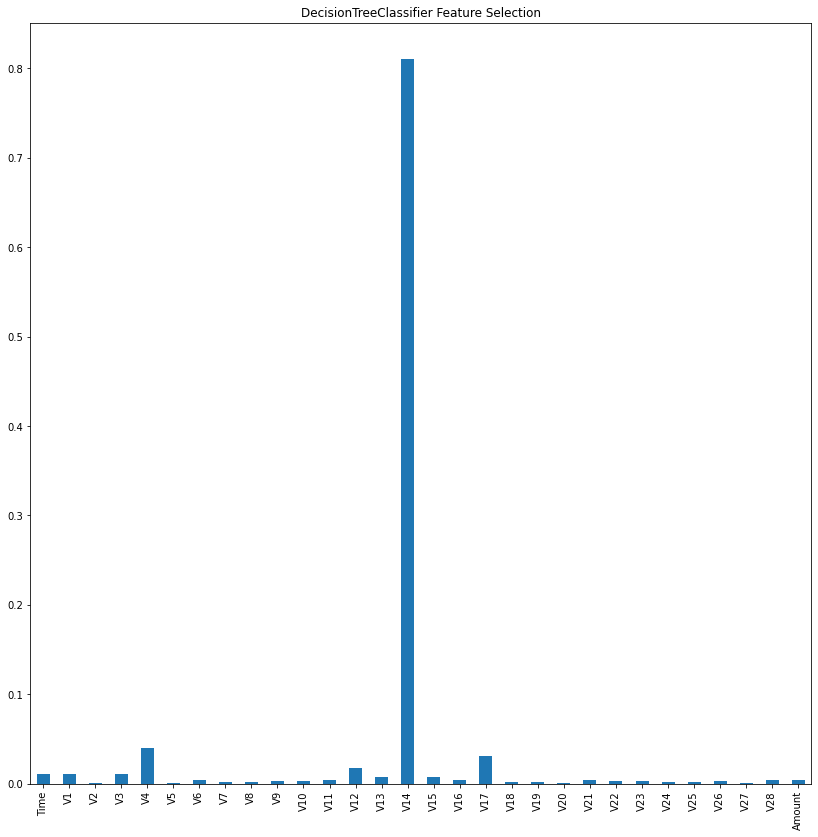

In [ ]:
#Plot of feature Importance by DecisionTreeClassifier
feat_imp.plot(kind='bar',figsize=(14,14),title='DecisionTreeClassifier Feature Selection')

In [34]:
#ANOVA Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
X_selected = fs.fit_transform(X_SM, Y_SM)

In [35]:
#Feature Scores by ANOVA Feature Selection
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 12432.601724
Feature 1: 149595.131857
Feature 2: 220621.274370
Feature 3: 311029.703466
Feature 4: 698665.958777
Feature 5: 104854.247906
Feature 6: 123745.337357
Feature 7: 204794.713896
Feature 8: 1824.222715
Feature 9: 317910.485637
Feature 10: 440934.857493
Feature 11: 608503.811787
Feature 12: 583706.886852
Feature 13: 1307.052507
Feature 14: 931474.543159
Feature 15: 1846.319096
Feature 16: 371665.685563
Feature 17: 307878.544485
Feature 18: 186377.000140
Feature 19: 54068.917592
Feature 20: 19134.789911
Feature 21: 11097.842048
Feature 22: 22.728013
Feature 23: 17.168575
Feature 24: 6045.150035
Feature 25: 1032.177200
Feature 26: 2258.021689
Feature 27: 4003.858209
Feature 28: 5515.461618
Feature 29: 566.636605


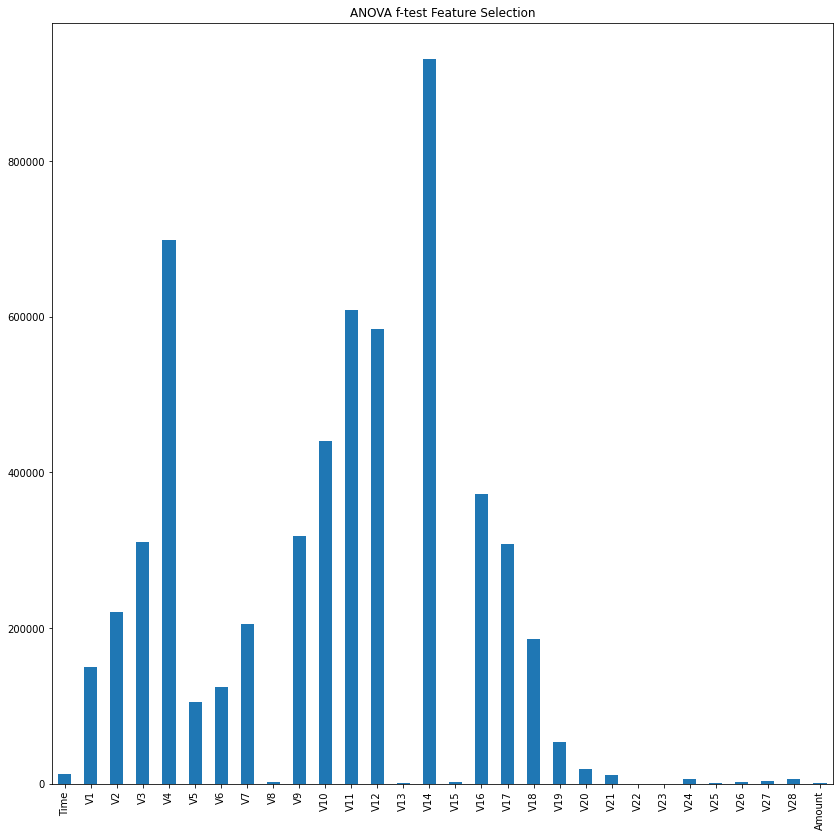

In [36]:
feat_imp_anova=pd.Series(fs.scores_, index=data.columns[0:30])
feat_imp_anova.plot(kind='bar',figsize=(14,14),title='ANOVA f-test Feature Selection')

In [ ]:
#Top features according to ANOVA f-test Feature Selection
selector = SelectKBest(f_classif, k=23)
X_reduced = selector.fit_transform(X_SM,Y_SM)
X_reduced.shape
cols = selector.get_support(indices=True)
selected_columns = X_SM.iloc[:,cols].columns.tolist()
selected_columns

In [ ]:
#Mutual Information Classification Feature Selection
from sklearn.feature_selection import mutual_info_classif as MIC
mic_score = MIC(X_SM,Y_SM)
# Feature Scores by MIC Feature Selection
for i in range(len(mic_score)):
	print('Feature %d: %f' % (i, mic_score[i]))

Feature 0: 0.282099
Feature 1: 0.232245
Feature 2: 0.304570
Feature 3: 0.401970
Feature 4: 0.442271
Feature 5: 0.165286
Feature 6: 0.195070
Feature 7: 0.326937
Feature 8: 0.172908
Feature 9: 0.287121
Feature 10: 0.477609
Feature 11: 0.429776
Feature 12: 0.473807
Feature 13: 0.027649
Feature 14: 0.542187
Feature 15: 0.027639
Feature 16: 0.357761
Feature 17: 0.445133
Feature 18: 0.218279
Feature 19: 0.111845
Feature 20: 0.123121
Feature 21: 0.242710
Feature 22: 0.037336
Feature 23: 0.071464
Feature 24: 0.071537
Feature 25: 0.039344
Feature 26: 0.060445
Feature 27: 0.250485
Feature 28: 0.188776
Feature 29: 0.419385


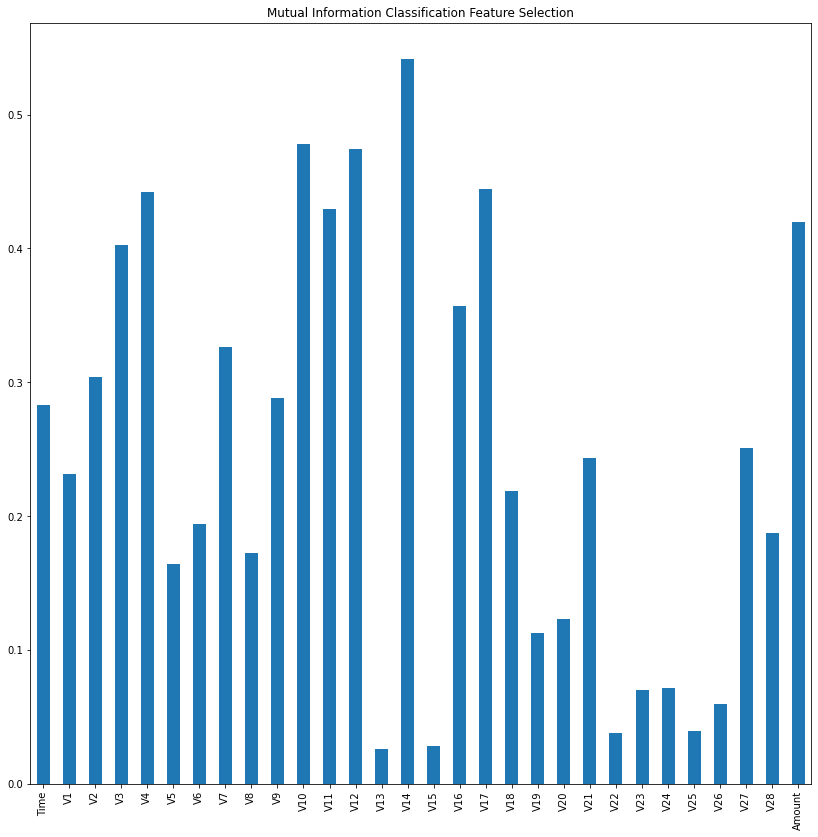

In [ ]:
feat_imp_mic=pd.Series(mic_score, index=data.columns[0:30])
feat_imp_mic.plot(kind='bar',figsize=(14,14),title='Mutual Information Classification Feature Selection')

In [ ]:
#Top features according to Mutual Information Classification Feature Selection
selector = SelectKBest(MIC, k=23)
X_reduced = selector.fit_transform(X_SM,Y_SM)
X_reduced.shape
cols = selector.get_support(indices=True)
selected_columns = X_SM.iloc[:,cols].columns.tolist()
selected_columns

In [ ]:
#Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe=RFE(estimator=dt)
rfe.fit(X_SM,Y_SM)
for i in range(X.shape[1]):
  print("Column: %d, Selected %s, Rank: %.1f"%(i,rfe.support_[i],rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.0
Column: 1, Selected False, Rank: 4.0
Column: 2, Selected False, Rank: 16.0
Column: 3, Selected False, Rank: 12.0
Column: 4, Selected True, Rank: 1.0
Column: 5, Selected True, Rank: 1.0
Column: 6, Selected False, Rank: 11.0
Column: 7, Selected False, Rank: 6.0
Column: 8, Selected False, Rank: 7.0
Column: 9, Selected False, Rank: 15.0
Column: 10, Selected True, Rank: 1.0
Column: 11, Selected False, Rank: 8.0
Column: 12, Selected True, Rank: 1.0
Column: 13, Selected True, Rank: 1.0
Column: 14, Selected True, Rank: 1.0
Column: 15, Selected False, Rank: 2.0
Column: 16, Selected True, Rank: 1.0
Column: 17, Selected True, Rank: 1.0
Column: 18, Selected False, Rank: 14.0
Column: 19, Selected True, Rank: 1.0
Column: 20, Selected True, Rank: 1.0
Column: 21, Selected True, Rank: 1.0
Column: 22, Selected False, Rank: 3.0
Column: 23, Selected False, Rank: 5.0
Column: 24, Selected True, Rank: 1.0
Column: 25, Selected False, Rank: 10.0
Column: 26, Selected True, Ra

In [ ]:
#Recursive Feature Elimination Cross-Validation (RFECV)
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=dt)
rfecv.fit(X_SM,Y_SM)
for i in range(X_train.shape[1]):
  print("Column: %d, Selected %s, Rank: %.1f"%(i,rfecv.support_[i],rfecv.ranking_[i]))

Column: 0, Selected False, Rank: 11.0
Column: 1, Selected False, Rank: 10.0
Column: 2, Selected False, Rank: 27.0
Column: 3, Selected False, Rank: 24.0
Column: 4, Selected False, Rank: 4.0
Column: 5, Selected False, Rank: 21.0
Column: 6, Selected False, Rank: 20.0
Column: 7, Selected False, Rank: 15.0
Column: 8, Selected False, Rank: 17.0
Column: 9, Selected False, Rank: 25.0
Column: 10, Selected True, Rank: 1.0
Column: 11, Selected False, Rank: 13.0
Column: 12, Selected False, Rank: 3.0
Column: 13, Selected False, Rank: 14.0
Column: 14, Selected True, Rank: 1.0
Column: 15, Selected False, Rank: 12.0
Column: 16, Selected False, Rank: 5.0
Column: 17, Selected True, Rank: 1.0
Column: 18, Selected False, Rank: 26.0
Column: 19, Selected False, Rank: 7.0
Column: 20, Selected False, Rank: 8.0
Column: 21, Selected False, Rank: 9.0
Column: 22, Selected False, Rank: 19.0
Column: 23, Selected False, Rank: 16.0
Column: 24, Selected False, Rank: 6.0
Column: 25, Selected False, Rank: 22.0
Column: 2

##Optimized Dataset and Final Models

In [56]:
data_final = data_SM.drop(['V5','V9','V22','V24','V27','V28'], axis=1)

In [57]:
print(data_final.shape)

(568630, 25)


In [58]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data_final.drop("Class",axis=1)
target = data_final["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [59]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(454904, 24) (454904,) (113726, 24) (113726,)


In [ ]:
#Random Forest
rf = RandomForestClassifier()
st=time.time()
rf.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_rf=rf.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_rf)))
st=time.time()
Y_pred_rf = rf.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_rf,average='weighted')))
print(classification_report(Y_test,Y_pred_rf))

In [60]:
#Decision Tree
dt = DecisionTreeClassifier()
st=time.time()
dt.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_dt=dt.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_dt)))
st=time.time()
Y_pred_dt = dt.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_dt,average='weighted')))
print(classification_report(Y_test,Y_pred_dt))

Training Time: 48.883790254592896
Training Accuracy Score: 1.0
Pred Time: 0.02382802963256836
Testing Accuracy Score: 0.9983908692823101
AUC Score: 0.9983889896432661
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [61]:
#XGBoost Classifier
import xgboost
xgb = xgboost.XGBClassifier(objective="binary:logistic")
st=time.time()
xgb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_xgb=xgb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_xgb)))
st=time.time()
Y_pred_xgb = xgb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_xgb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_xgb,average='weighted')))
print(classification_report(Y_test,Y_pred_xgb))

Training Time: 123.79791474342346
Training Accuracy Score: 0.9871951005047219
Pred time: 0.39470624923706055
Testing Accuracy Score: 0.9868719554015792
AUC Score: 0.9868873315190742
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56724
           1       0.99      0.98      0.99     57002

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [62]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test,Y_pred_rf)
cm_dt = confusion_matrix(Y_test,Y_pred_dt)
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)

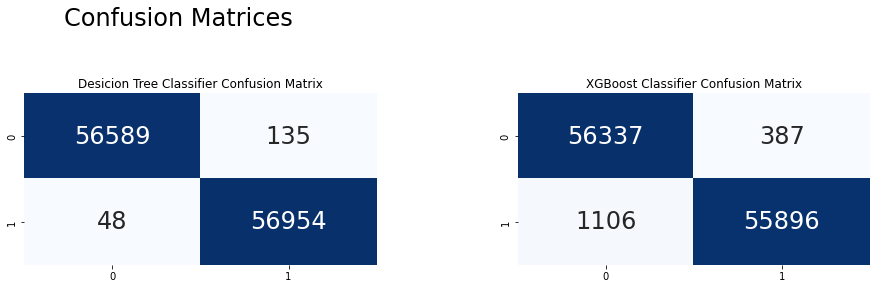

In [63]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Desicion Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("XGBoost Classifier Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})